# Training Metrics Heatmap

   Epoch  Accuracy  Val Accuracy    Loss  Val Loss     IoU  Val IoU    Dice  \
0      1    0.9479        0.9839 -0.2295   -0.0851  0.1380   0.0483  0.2295   
1      2    0.9884        0.9892 -0.4045   -0.0181  0.2671   0.0162  0.4041   
2      3    0.9898        0.9889 -0.4614   -0.0209  0.3148   0.0241  0.4624   
3      4    0.9907        0.9897 -0.5247   -0.0235  0.3679   0.0345  0.5243   
4      5    0.9919        0.9905 -0.5842   -0.0636  0.4245   0.0476  0.5854   

   Val Dice  
0    0.0851  
1    0.0181  
2    0.0243  
3    0.0345  
4    0.0653  


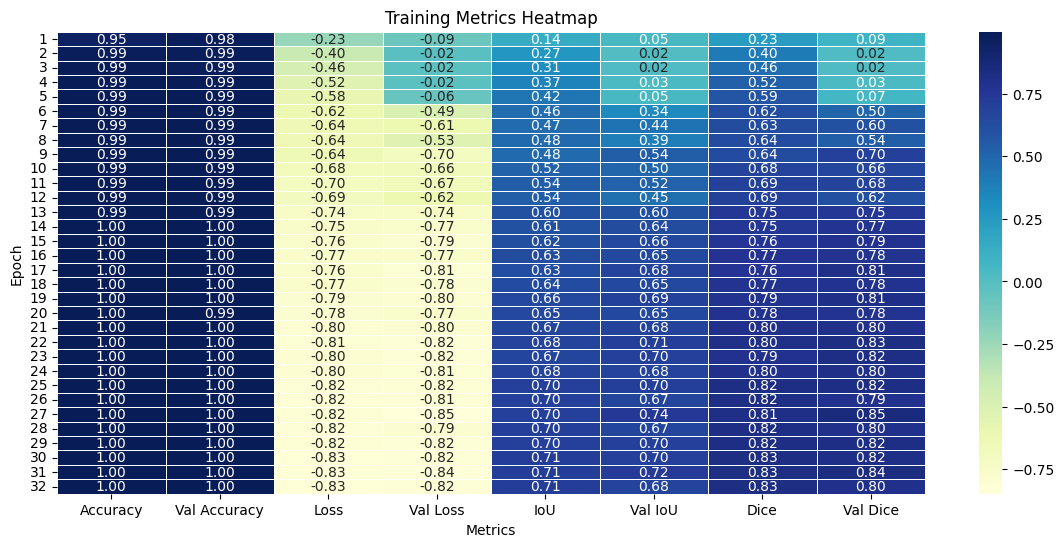

In [17]:
import pandas as pd
import seaborn as sns_style
import matplotlib.pyplot as pltx

df = pd.read_excel('/content/drive/MyDrive/training_log_highlighted.xlsx')


print(df.head())


if 'Epoch' in df.columns:
    df.set_index('Epoch', inplace=True)


pltx.figure(figsize=(14, 6))
sns_style.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)


pltx.title('Training Metrics Heatmap')
pltx.xlabel('Metrics')
pltx.ylabel('Epoch')


pltx.savefig('/content/drive/MyDrive/training_heatmap_from_excel.png', dpi=300, bbox_inches='tight')


pltx.show()


# Assessing Model Performance Using Test Data


In [18]:
import os as operating_sys
import numpy as npy
import cv2 as opencv_img
import pandas as pdx
from glob import glob as find_files
from tensorflow.keras.models import load_model

*Configuration Settings for Model Evaluation*

In [19]:
img_size = (128, 128)
Threshold = 0.5
model_path = '/content/drive/MyDrive/NEW_MODEL.keras'
test_folder = '/content/drive/MyDrive/test_data_backup'
csv_output = '/content/drive/MyDrive/Segmentation_metrics.csv'



*Load the Trained Model for Prediction*

In [20]:
model = load_model(model_path, compile=False)



In [21]:
def preprocess_image(path):
    img = opencv_img.imread(path, opencv_img.IMREAD_GRAYSCALE)
    img = opencv_img.resize(img, img_size) / 255.0
    img = npy.expand_dims(img, axis=(0, -1))  # shape: (1, 128, 128, 1)
    return img

def load_binary_mask(path):
    mask = opencv_img.imread(path,opencv_img.IMREAD_GRAYSCALE)
    mask = opencv_img.resize(mask, img_size)
    return (mask >= 127).astype(npy.uint8)

def predict_mask(image_path):
    img = preprocess_image(image_path)
    pred = model.predict(img)[0, :, :, 0]
    return (pred >= Threshold).astype(npy.uint8)


*Functions for Image Preprocessing, Prediction, and Metric Calculation*

In [22]:
def compute_metrics(pred, true):
    tp = npy.sum((pred == 1) & (true == 1))
    tn = npy.sum((pred == 0) & (true == 0))
    fp = npy.sum((pred == 1) & (true == 0))
    fn = npy.sum((pred == 0) & (true == 1))

    # Dice & IoU: both masks are empty
    if npy.sum(true) == 0 and npy.sum(pred) == 0:
        dice_coefficient = 1.0
        intersection_over_union = 1.0
    else:
        denominator_dice = 2 * tp + fp + fn
        denominator_iou = tp + fp + fn
        dice_coefficient = (2 * tp) / denominator_dice if denominator_dice != 0 else 0
        intersection_over_union = tp / denominator_iou if denominator_iou != 0 else 0

    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else None

    # Specificity
    specificity = tn / (tn + fp) if (tn + fp) != 0 else None

    # Precision
    precision = tp / (tp + fp) if (tp + fp) != 0 else None

    # F1 Score
    if precision is None or sensitivity is None or (precision + sensitivity) == 0:
        f1 = None
    else:
        f1 = (2 * precision * sensitivity) / (precision + sensitivity)

    return dice_coefficient, intersection_over_union, sensitivity, specificity, precision, f1, tp, tn, fp, fn


*Load and Organize Test Image and Mask File Paths*

In [23]:
all_files = find_files(operating_sys.path.join(test_folder, '*.tif'))
image_files = [f for f in all_files if '_mask' not in operating_sys.path.basename(f)]
mask_files = {operating_sys.path.basename(f).replace('_mask.tif', ''): f for f in all_files if '_mask' in operating_sys.path.basename(f)}



In [24]:
# model = load_model(model_path, compile=True)

# loss, accuracy = model.evaluate(image_files,mask_files)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

*Initialize Counters for Overall Metrics and Create Results List*

In [25]:
total_tp = total_tn = total_fp = total_fn = 0
results = []



In [26]:
for img_path in image_files:
    base_name = operating_sys.path.basename(img_path).replace('.tif', '')
    if base_name not in mask_files:
        print(f"No mask found for: {base_name}")
    else:
        print(f"Found mask for: {base_name}")


Found mask for: TCGA_CS_4941_19960909_7
Found mask for: TCGA_CS_4941_19960909_18
Found mask for: TCGA_CS_4942_19970222_10
Found mask for: TCGA_CS_4941_19960909_22
Found mask for: TCGA_CS_4941_19960909_11
Found mask for: TCGA_CS_4941_19960909_21
Found mask for: TCGA_CS_5393_19990606_5
Found mask for: TCGA_CS_4944_20010208_14
Found mask for: TCGA_CS_5395_19981004_17
Found mask for: TCGA_CS_4944_20010208_17
Found mask for: TCGA_CS_4943_20000902_5
Found mask for: TCGA_CS_5396_20010302_11
Found mask for: TCGA_CS_4943_20000902_7
Found mask for: TCGA_CS_5395_19981004_13
Found mask for: TCGA_CS_4944_20010208_7
Found mask for: TCGA_CS_4944_20010208_11
Found mask for: TCGA_CS_5393_19990606_18
Found mask for: TCGA_CS_4944_20010208_15
Found mask for: TCGA_CS_4944_20010208_19
Found mask for: TCGA_CS_5397_20010315_18
Found mask for: TCGA_CS_6186_20000601_11
Found mask for: TCGA_CS_5397_20010315_8
Found mask for: TCGA_CS_6186_20000601_21
Found mask for: TCGA_CS_6188_20010812_12
Found mask for: TCGA_C

*Loop Through Test Images, Predict Masks, Compute Metrics, and Store Results*

In [27]:
for img_path in image_files:
    base_name = operating_sys.path.basename(img_path).replace('.tif', '')
    mask_path = mask_files.get(base_name)

    if not mask_path:
        print(f"Skipping: {img_path} (No mask found)")
        continue

    pred_mask = predict_mask(img_path)
    true_mask = load_binary_mask(mask_path)

    dice, iou, sens, spec, prec, f1, tp, tn, fp, fn = compute_metrics(pred_mask, true_mask)

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    results.append({
        'Image': operating_sys.path.basename(img_path),
        'Dice': round(dice, 4),
        'IoU': round(iou, 4),
        'Sensitivity': round(sens, 4) if sens is not None else 'NA',
        'Specificity': round(spec, 4) if spec is not None else 'NA',
        'Precision': round(prec, 4) if prec is not None else 'NA',
        'F1_Score': round(f1, 4) if f1 is not None else 'NA',
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
    })


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━

*Calculate Overall Evaluation Metrics for All Test Images*

In [28]:
# Handle special case: no positive prediction and no actual tumor
if (total_tp + total_fp + total_fn) == 0:
    dice_total = 1.0
    iou_total = 1.0
else:
    dice_total = (2 * total_tp) / (2 * total_tp + total_fp + total_fn)
    iou_total = total_tp / (total_tp + total_fp + total_fn)

# Sensitivity: if no actual tumor at all, set as 'N/A' or 1.0 based on convention
if (total_tp + total_fn) == 0:
    sensitivity_total = None  # or 1.0 if you want to follow original logic
else:
    sensitivity_total = total_tp / (total_tp + total_fn)

# Specificity: if no actual background
if (total_tn + total_fp) == 0:
    specificity_total = None  # or 1.0
else:
    specificity_total = total_tn / (total_tn + total_fp)

# Precision: if model never predicted tumor
if (total_tp + total_fp) == 0:
    precision_total = None  # or 1.0
else:
    precision_total = total_tp / (total_tp + total_fp)

# F1 Score: valid only if precision and sensitivity are not None
if precision_total is None or sensitivity_total is None or (precision_total + sensitivity_total) == 0:
    f1_total = None
else:
    f1_total = (2 * precision_total * sensitivity_total) / (precision_total + sensitivity_total)


Metrics such as Sensitivity, Specificity, Precision, and F1 Score can become None when their denominators are zero, making the calculation undefined. This situation typically arises in special or edge cases. Sensitivity becomes None when there are no tumor pixels in the ground truth (TP + FN = 0), meaning there's nothing to detect. Specificity is None when the ground truth contains only tumor pixels and no background (TN + FP = 0), so there’s nothing to reject as background. Precision is undefined when the model never predicts any tumor at all (TP + FP = 0), making the concept of correctness in tumor prediction meaningless. Lastly, the F1 Score becomes None if either Precision or Sensitivity is None, or if both are zero, because it relies on their harmonic mean. These cases should be handled carefully in code, especially when presenting results or logging metrics.

 *Append Overall Metrics to Results for CSV Report*

In [29]:
results.append({
    'Image': 'Overall',
    'Dice': round(dice_total, 4),
    'IoU': round(iou_total, 4),
    'Sensitivity': round(sensitivity_total, 4) if sensitivity_total is not None else 'NA',
    'Specificity': round(specificity_total, 4) if specificity_total is not None else 'NA',
    'Precision': round(precision_total, 4) if precision_total is not None else 'NA',
    'F1_Score': round(f1_total, 4) if f1_total is not None else 'NA',
    'TP': total_tp, 'TN': total_tn, 'FP': total_fp, 'FN': total_fn
})




*Save All Results to CSV File and Print Overall Performance*

In [30]:
df = pdx.DataFrame(results)
df.to_csv(csv_output, index=False)

print(f"CSV saved: {csv_output}")
print(f"Overall Dice: {dice_total:.4f}, IoU: {iou_total:.4f}, Sensitivity: {sensitivity_total:.4f}, Specificity: {specificity_total:.4f}")


CSV saved: /content/drive/MyDrive/Segmentation_metrics.csv
Overall Dice: 0.7821, IoU: 0.6422, Sensitivity: 0.7710, Specificity: 0.9981


# Load and Predict Brain Tumor from MRI Image with Visualization of Original and Predicted Masks

In [35]:
def visualize_prediction(image_path):
    base_name = operating_sys.path.basename(image_path).replace('.tif', '')
    mask_name = base_name + '_mask.tif'
    mask_path = operating_sys.path.join(test_folder, mask_name)

    if not operating_sys.path.exists(mask_path):
        print(f"Error: No mask found for image {base_name}")
        return

    original_img = opencv_img.imread(image_path, opencv_img.IMREAD_GRAYSCALE)
    resized_img = opencv_img.resize(original_img, img_size)

    pred_mask = predict_mask(image_path)
    true_mask = load_binary_mask(mask_path)

    dice, iou, sens, spec, prec, f1, tp, tn, fp, fn = compute_metrics(pred_mask, true_mask)

    fig, axs = pltx.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(resized_img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(true_mask, cmap='gray')
    axs[1].set_title('Ground Truth Mask')
    axs[1].axis('off')

    axs[2].imshow(pred_mask, cmap='gray')
    axs[2].set_title('Predicted Mask')
    axs[2].axis('off')

    pltx.tight_layout()
    pltx.show()

    print(f"Metrics for: {base_name}.tif")
    print(f"Dice Coefficient     : {dice:.4f}")
    print(f"IoU                  : {iou:.4f}")
    print(f"Sensitivity (Recall) : {sens:.4f}" if sens is not None else "Sensitivity (Recall) : NA")
    print(f"Specificity          : {spec:.4f}" if spec is not None else "Specificity          : NA")
    print(f"Precision            : {prec:.4f}" if prec is not None else "Precision            : NA")
    print(f"F1 Score             : {f1:.4f}" if f1 is not None else "F1 Score             : NA")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

# Predict and Display Tumor Mask for Test Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


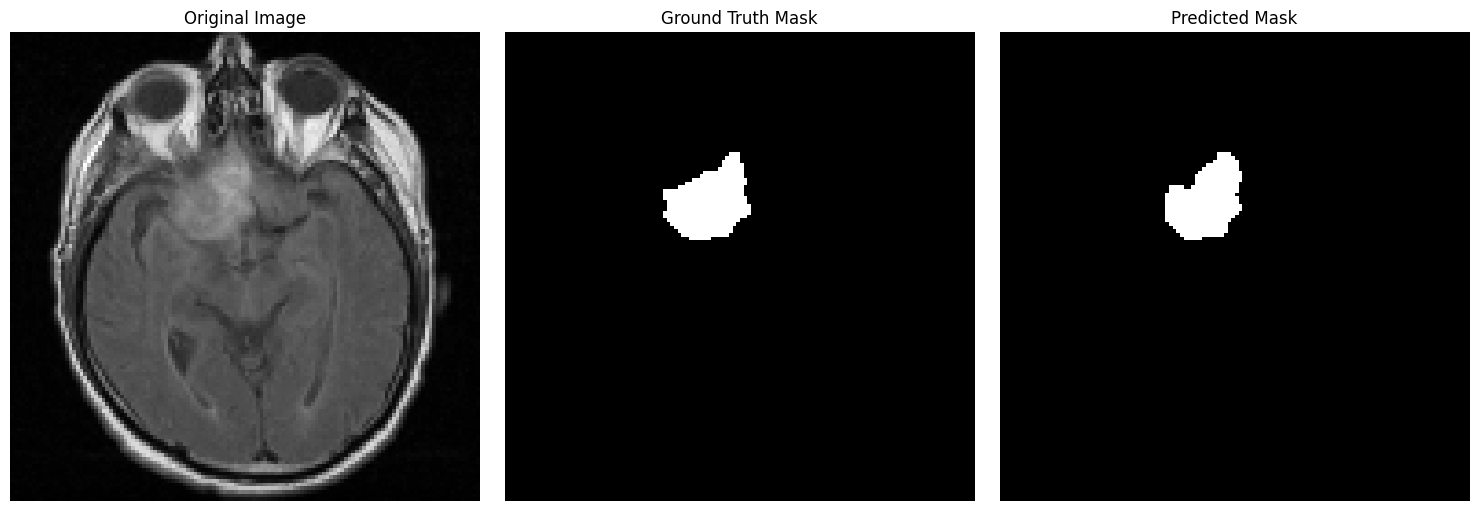

Metrics for: TCGA_CS_4941_19960909_11.tif
Dice Coefficient     : 0.9224
IoU                  : 0.8560
Sensitivity (Recall) : 0.8886
Specificity          : 0.9991
Precision            : 0.9589
F1 Score             : 0.9224
TP: 327, TN: 16002, FP: 14, FN: 41


In [36]:
img_path = '/content/drive/MyDrive/test_data_backup/TCGA_CS_4941_19960909_11.tif'
visualize_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


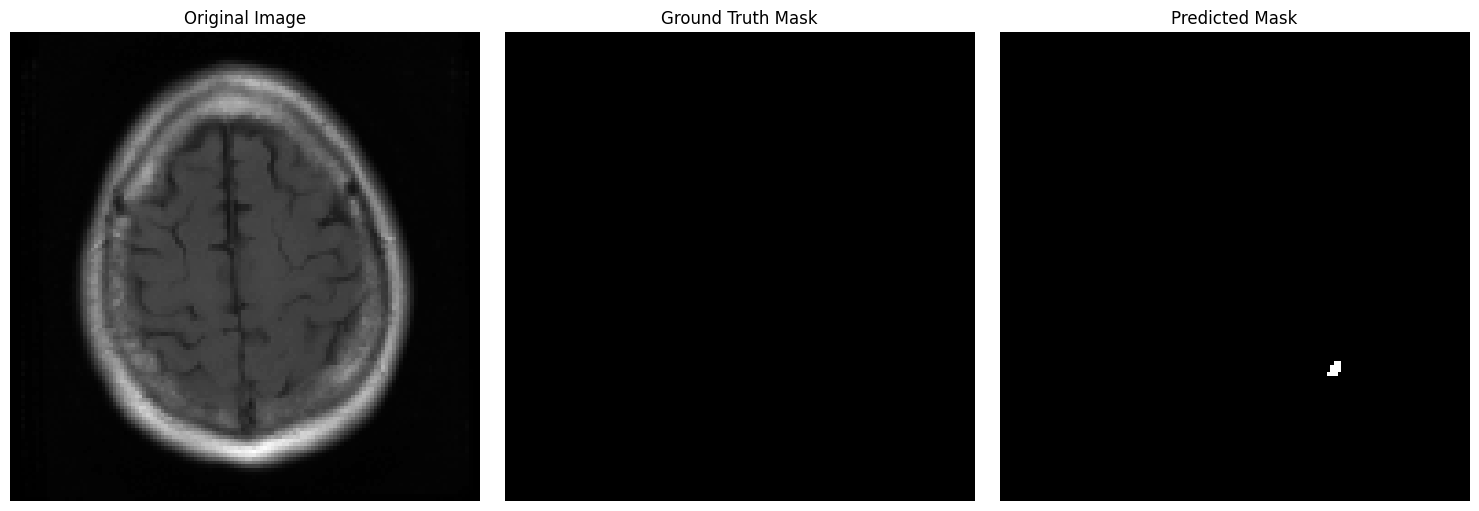

Metrics for: TCGA_CS_6188_20010812_19.tif
Dice Coefficient     : 0.0000
IoU                  : 0.0000
Sensitivity (Recall) : NA
Specificity          : 0.9993
Precision            : 0.0000
F1 Score             : NA
TP: 0, TN: 16373, FP: 11, FN: 0


In [37]:
img_path = '/content/drive/MyDrive/test_data_backup/TCGA_CS_6188_20010812_19.tif'
visualize_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


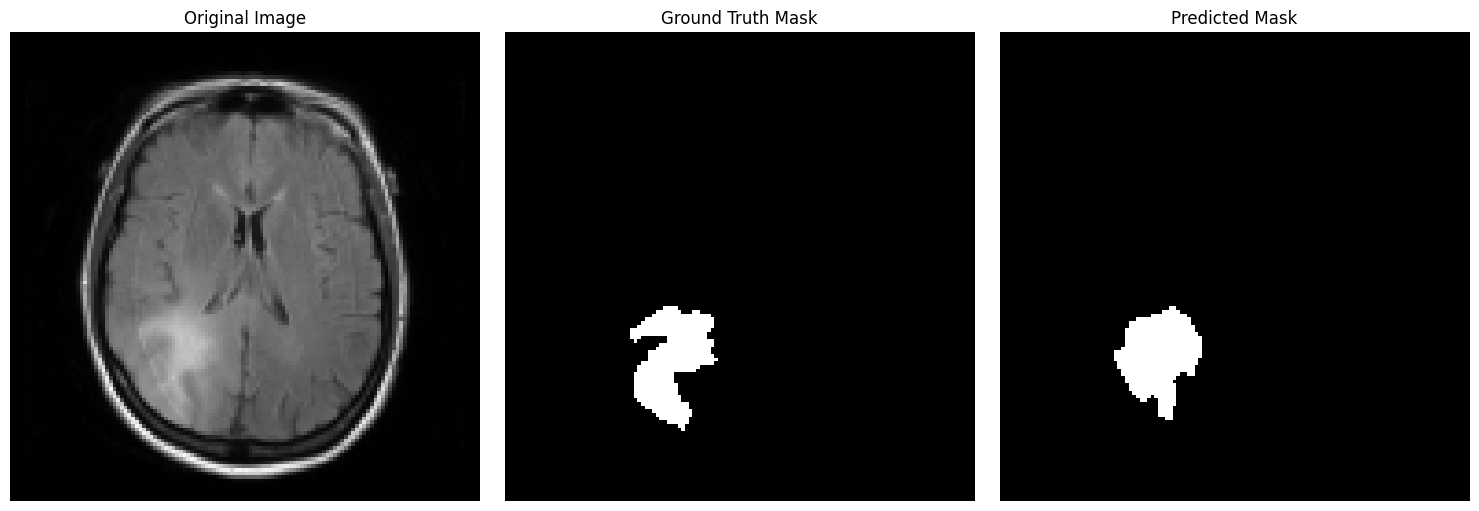

Metrics for: TCGA_CS_6665_20010817_15.tif
Dice Coefficient     : 0.7884
IoU                  : 0.6507
Sensitivity (Recall) : 0.7797
Specificity          : 0.9944
Precision            : 0.7973
F1 Score             : 0.7884
TP: 354, TN: 15840, FP: 90, FN: 100


In [38]:
img_path = '/content/drive/MyDrive/test_data_backup/TCGA_CS_6665_20010817_15.tif'
visualize_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


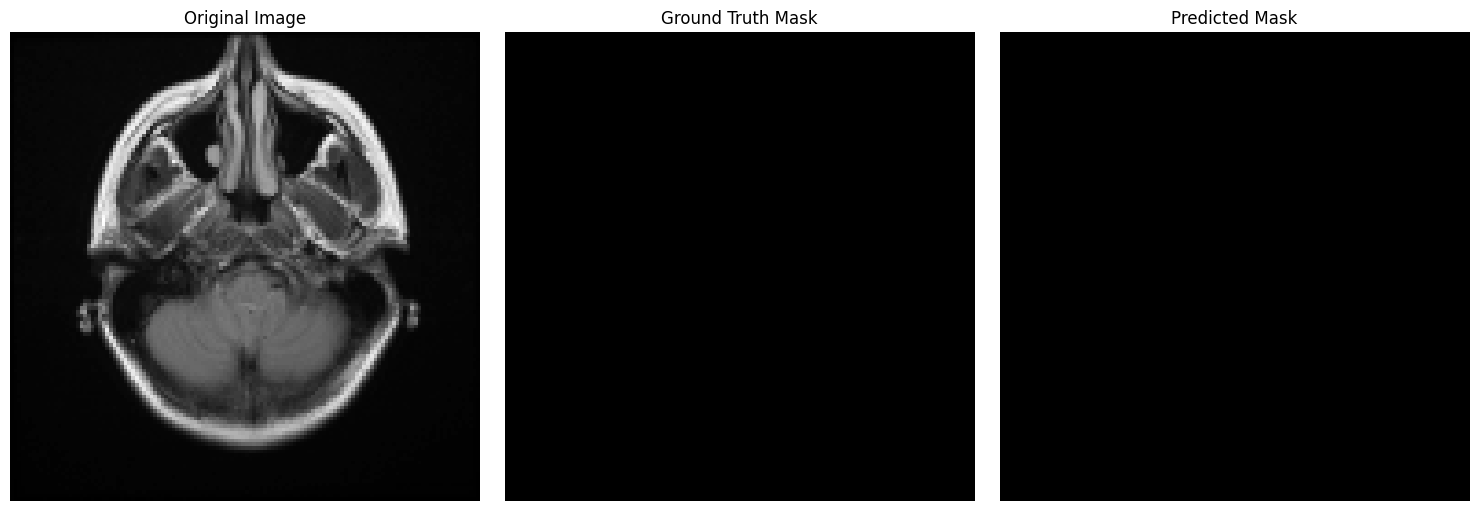

Metrics for: TCGA_CS_6667_20011105_4.tif
Dice Coefficient     : 1.0000
IoU                  : 1.0000
Sensitivity (Recall) : NA
Specificity          : 1.0000
Precision            : NA
F1 Score             : NA
TP: 0, TN: 16384, FP: 0, FN: 0


In [39]:
img_path = '/content/drive/MyDrive/test_data_backup/TCGA_CS_6667_20011105_4.tif'
visualize_prediction(img_path)

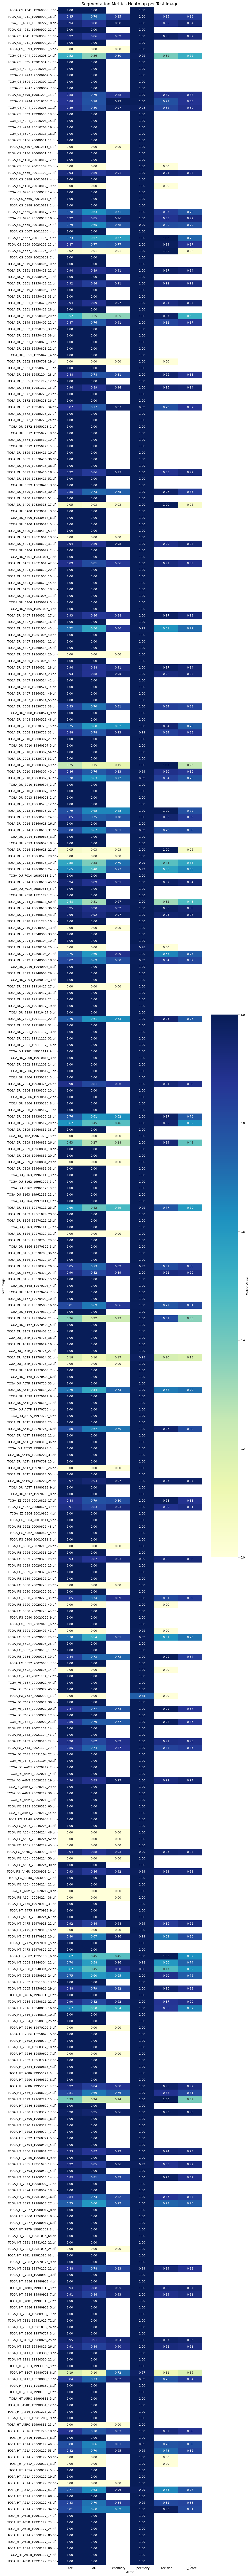

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/Segmentation_metrics.csv')


df = df[df['Image'] != 'Overall']

metrics = ['Dice', 'IoU', 'Sensitivity', 'Specificity', 'Precision', 'F1_Score']


df_heatmap = df.set_index('Image')[metrics]

plt.figure(figsize=(12, len(df_heatmap) * 0.3 + 4))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Metric Value'})
plt.title("Segmentation Metrics Heatmap per Test Image", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Test Image")
plt.tight_layout()


plt.savefig('/content/drive/MyDrive/Segmentation_Metrics_Heatmap.pdf')
plt.show()


df_long = df.melt(id_vars='Image', value_vars=metrics, var_name='Metric', value_name='Score')







In [41]:
fig = px.box(
    df_long,
    x="Metric",
    y="Score",
    color="Metric",
    points="all",
    hover_name="Image",
    title=("Interactive Metric Distribution")
)

fig.update_traces(
    jitter=0.6,
    marker=dict(size=4, opacity=0.8)
)

fig.update_layout(
    width=1600,
    height=800,
    showlegend=False
)


fig.show()